<a href="https://colab.research.google.com/github/Cospero/Kursovaya-/blob/main/Kursovaya_Kobrin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import linear_model

from sklearn import metrics
from sklearn import ensemble

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def Datapreperation():
    df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/crypto-markets.csv')
    bitcoin_df = pd.DataFrame(df.loc[df.name =="Bitcoin", ["date", "open", "close", "high", "low","market","close_ratio","spread"]]).set_index("date")
    bitcoin_df["close_nextday"] = bitcoin_df["close"].shift(periods = -1, fill_value = 0)
    temp = bitcoin_df[["open", "close", "high", "low","market","close_ratio","spread"]]
    temp = temp[1600:]
    return bitcoin_df, temp

In [ ]:
bitcoin_df, temp = Datapreperation()

In [ ]:
def TestTrainpreperation(bitcoin_df):
    X = bitcoin_df[["open", "close", "high", "low"]]
    y = bitcoin_df[["close_nextday"]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.632e+07, tolerance: 1.679e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58121600.43332482, tolerance: 1679263.1625392379
  ) = cd_fast.enet_coordinate_descent_multi_task(


MSE: 36545.25819805708
MAE: 75.86178843739508
R2: 0.9969464992942082


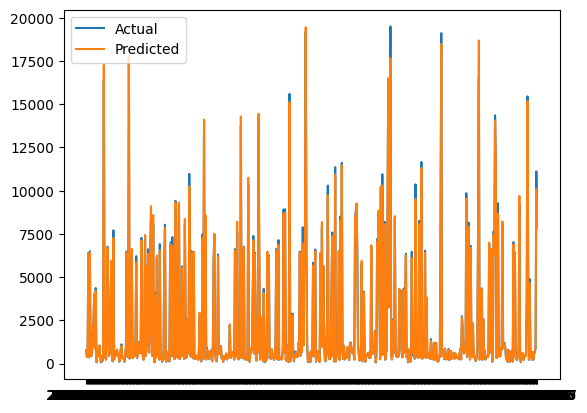

In [ ]:
score = pd.DataFrame(index = ["r2_score", "mean_squared_error", "mean_absolute_error" ], columns= ["RandomForestRegressor", "LinearRegression", "DecisionTreeRegressor","KNeighborsRegressor"])

X_train, X_test, y_train, y_test = TestTrainpreperation(bitcoin_df)

model1 = LinearRegression()
model1.fit(X_train, y_train)

model2 = DecisionTreeRegressor(max_depth=3)
model2.fit(X_train, y_train)

model3 = KNeighborsRegressor(n_neighbors=3)
model3.fit(X_train, y_train)

model4 = xgb.XGBRegressor(max_depth=3, n_estimators=100)
model4.fit(X_train, y_train)

model5 = Ridge(alpha=1.0)
model5.fit(X_train, y_train)

model6 =ElasticNet(random_state=0)
model6.fit(X_train, y_train)


X_train_meta = np.column_stack((
    cross_val_predict(model1, X_train, y_train, cv=3),
    cross_val_predict(model2, X_train, y_train, cv=3),
    cross_val_predict(model3, X_train, y_train, cv=3),
    cross_val_predict(model4, X_train, y_train, cv=3),

))

X_test_meta = np.column_stack((
    model1.predict(X_test),
    model2.predict(X_test),
    model3.predict(X_test),
    model4.predict(X_test),


))


meta_model = linear_model.MultiTaskLasso()
meta_model.fit(X_train_meta, y_train)

y_pred = meta_model.predict(X_test_meta)



mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [ ]:
y_pred_model1 = model1.predict(X_test)
y_pred_model2 = model2.predict(X_test)
y_pred_model3 = model3.predict(X_test)
y_pred_model4 = model4.predict(X_test)
y_pred_model5 = model5.predict(X_test)
y_pred_model6 = model6.predict(X_test)

mse_model1 = metrics.r2_score(y_test, model1.predict(X_test))
mae_model1 = metrics.mean_squared_error(y_test, model1.predict(X_test))
r2_model1 =  r2_score(y_test, y_pred_model1)

mse_model2 = mean_squared_error(y_test, y_pred_model2)
mae_model2 = mean_absolute_error(y_test, y_pred_model2)
r2_model2 = r2_score(y_test, y_pred_model2)

mse_model3 = mean_squared_error(y_test, y_pred_model3)
mae_model3 = mean_absolute_error(y_test, y_pred_model3)
r2_model3 = r2_score(y_test, y_pred_model3)

mse_model4 = mean_squared_error(y_test, y_pred_model4)
mae_model4 = mean_absolute_error(y_test, y_pred_model4)
r2_model4 = r2_score(y_test, y_pred_model4)

mse_model5 = mean_squared_error(y_test, y_pred_model5)
mae_model5 = mean_absolute_error(y_test, y_pred_model5)
r2_model5 = r2_score(y_test, y_pred_model5)

mse_model6 = mean_squared_error(y_test, y_pred_model6)
mae_model6 = mean_absolute_error(y_test, y_pred_model6)
r2_model6 = r2_score(y_test, y_pred_model6)


print('Model 1 R2:', r2_model1)

print('Model 2 R2:', r2_model2)

print('Model 3 R2:', r2_model3)

print('Model 4 R2:', r2_model4)

print('Model 5 R2:', r2_model5)

print('Model 6 R2:', r2_model6)

Model 1 R2: 0.9966825237264361
Model 2 R2: 0.9802758512646808
Model 3 R2: 0.9940181494771653
Model 4 R2: 0.9929165611599312
Model 5 R2: 0.9966825238998576
Model 6 R2: 0.9972682024975793


In [ ]:
bitcoin_gtb = ensemble.GradientBoostingRegressor()
bitcoin_gtb.fit(X_test, y_test)
ac1= metrics.r2_score(y_test, bitcoin_gtb.predict(X_test))
mse= metrics.mean_squared_error(y_test, bitcoin_gtb.predict(X_test))
mae= metrics.mean_absolute_error(y_test, bitcoin_gtb.predict(X_test))

print(ac1)
print(mse)
print(mae)

0.9998163733787655
2197.7012392110846
24.58014101345406


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
